# Spotify Analysis

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from datetime import datetime as dt
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [2]:
cleaned_df = pd.read_csv('spotify_data clean.csv')
track_df = pd.read_csv('track_data_final.csv')

# Data Cleaning

In [3]:
cleaned_df.columns

Index(['track_id', 'track_name', 'track_number', 'track_popularity',
       'explicit', 'artist_name', 'artist_popularity', 'artist_followers',
       'artist_genres', 'album_id', 'album_name', 'album_release_date',
       'album_total_tracks', 'album_type', 'track_duration_min'],
      dtype='object')

In [4]:
cleaned_df.head()

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39


In [5]:
cleaned_df.shape

(8582, 15)

In [6]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            8582 non-null   object 
 1   track_name          8582 non-null   object 
 2   track_number        8582 non-null   int64  
 3   track_popularity    8582 non-null   int64  
 4   explicit            8582 non-null   bool   
 5   artist_name         8579 non-null   object 
 6   artist_popularity   8582 non-null   int64  
 7   artist_followers    8582 non-null   int64  
 8   artist_genres       5221 non-null   object 
 9   album_id            8582 non-null   object 
 10  album_name          8582 non-null   object 
 11  album_release_date  8582 non-null   object 
 12  album_total_tracks  8582 non-null   int64  
 13  album_type          8582 non-null   object 
 14  track_duration_min  8582 non-null   float64
dtypes: bool(1), float64(1), int64(5), object(8)
memory usag

In [7]:
cleaned_df.isnull().sum()

track_id                 0
track_name               0
track_number             0
track_popularity         0
explicit                 0
artist_name              3
artist_popularity        0
artist_followers         0
artist_genres         3361
album_id                 0
album_name               0
album_release_date       0
album_total_tracks       0
album_type               0
track_duration_min       0
dtype: int64

In [8]:
track_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8778 entries, 0 to 8777
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            8778 non-null   object 
 1   track_name          8776 non-null   object 
 2   track_number        8778 non-null   int64  
 3   track_popularity    8778 non-null   int64  
 4   track_duration_ms   8778 non-null   int64  
 5   explicit            8778 non-null   bool   
 6   artist_name         8774 non-null   object 
 7   artist_popularity   8774 non-null   float64
 8   artist_followers    8774 non-null   float64
 9   artist_genres       8774 non-null   object 
 10  album_id            8778 non-null   object 
 11  album_name          8776 non-null   object 
 12  album_release_date  8778 non-null   object 
 13  album_total_tracks  8778 non-null   int64  
 14  album_type          8778 non-null   object 
dtypes: bool(1), float64(2), int64(4), object(8)
memory usag

In [9]:
track_df_subset = (
    track_df[['track_id', 'track_duration_ms', 'album_release_date']]
    .copy()
    .rename(columns={'album_release_date': 'album_release_date_track'})
)

merged_df = cleaned_df.merge(track_df_subset, on='track_id', how='inner')

if 'album_release_date_track' in merged_df.columns:
    if 'album_release_date' in merged_df.columns:
        merged_df['album_release_date'] = merged_df['album_release_date_track'].combine_first(
            merged_df['album_release_date']
        )
    else:
        merged_df['album_release_date'] = merged_df['album_release_date_track']
    merged_df = merged_df.drop(columns=['album_release_date_track'])

merged_df

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min,track_duration_ms
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55,93584
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07,184582
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55,153142
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69,101769
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39,143914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8577,0AQquaENerGps8BQmbPw14,Big Iron,1,71,False,Marty Robbins,60,626733,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,1959,15,album,3.92,235733
8578,4f8hBeMXMvssn6HtFAtblo,El Paso,10,64,False,Marty Robbins,61,626733,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,1959,15,album,4.32,259306
8579,0Vy7wsXNFrbNc6UTWoScnM,Over the Rainbow,5,8,False,The Mystics,27,18184,doo-wop,2ifB9Xjp9DdpqLlYlY60QW,Presenting The Mystics,1959-02-11,9,compilation,2.28,137133
8580,760clbeDBWmBsBLbszWuNZ,I'm A Man,2,55,False,Bo Diddley,44,333376,"blues, classic blues, rock and roll, rockabilly",1cbtDEwxCjMhglb49OgNBR,Bo Diddley,1958-01-01,12,album,2.74,164546


In [10]:
merged_df['album_release_date'] = pd.to_datetime(merged_df['album_release_date'], errors='coerce')

In [11]:
merged_df.isna().sum()

track_id                 0
track_name               0
track_number             0
track_popularity         0
explicit                 0
artist_name              3
artist_popularity        0
artist_followers         0
artist_genres         3361
album_id                 0
album_name               0
album_release_date     198
album_total_tracks       0
album_type               0
track_duration_min       0
track_duration_ms        0
dtype: int64

In [12]:
merged_df.describe()

,track_number,track_popularity,artist_popularity,artist_followers,album_release_date,album_total_tracks,track_duration_min,track_duration_ms
count,8582.000000,8582.000000,8582.000000,8.582000e+03,8384,8582.000000,8582.000000,8582.000000
mean,5.772547,52.356211,69.730016,2.403472e+07,2015-12-18 17:32:31.145038080,13.789443,3.492805,209860.093451
min,1.000000,0.000000,0.000000,0.000000e+00,1952-09-12 00:00:00,1.000000,0.070000,4388.000000
25%,1.000000,39.000000,60.000000,4.623200e+05,2012-10-22 00:00:00,6.000000,2.880000,173333.000000
50%,4.000000,58.000000,74.000000,6.105547e+06,2018-05-10 12:00:00,13.000000,3.445000,206980.000000
75%,9.000000,71.000000,84.000000,2.725255e+07,2022-08-26 00:00:00,17.000000,3.990000,239560.000000
max,102.000000,99.000000,100.000000,1.455421e+08,2025-10-31 00:00:00,181.000000,13.510000,811077.000000
std,6.052792,23.816076,19.645979,3.803180e+07,NaN,11.887131,1.057970,63480.700737


In [13]:
merged_df.describe(include = ['object', 'bool'])

,track_id,track_name,explicit,artist_name,artist_genres,album_id,album_name,album_type
count,8582,8582,8582,8579,5221,8582,8582,8582
unique,8582,7462,2,2547,661,5205,4870,3
top,3EJS5LyekDim1Tf5rBFmZl,Home,False,Taylor Swift,soundtrack,3FFGbUutKWN1c4f0CJR4Uh,Nevermind (Super Deluxe Edition),album
freq,1,8,6434,324,345,70,70,5856


# Data Visualization

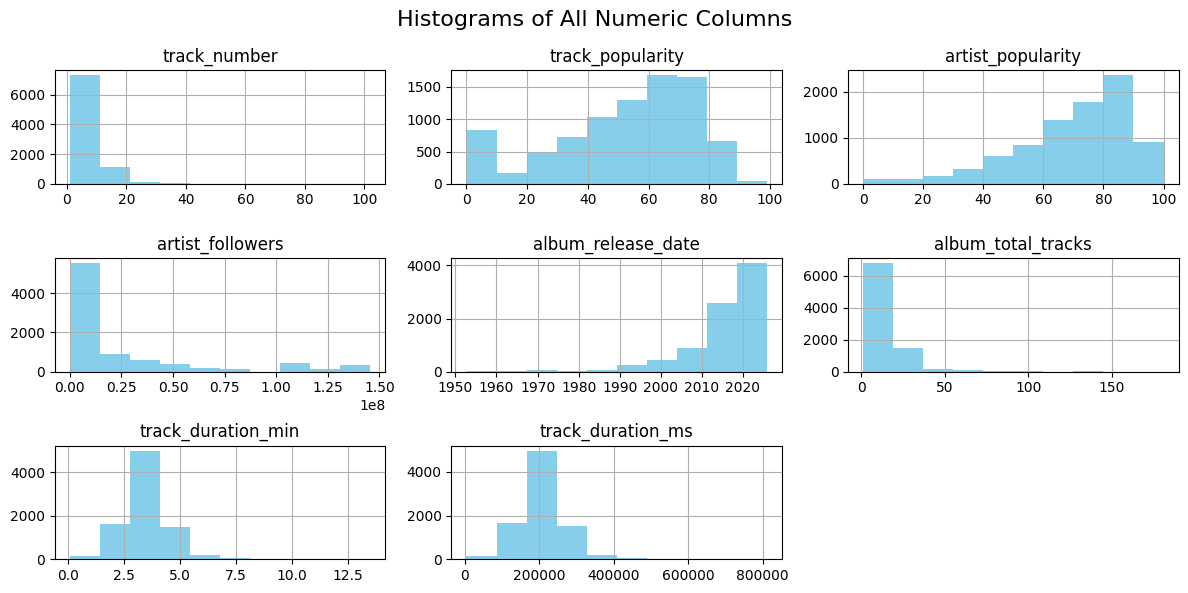

In [14]:
merged_df.hist(figsize=(12,6), color = 'skyblue')
plt.tight_layout()
plt.suptitle("Histograms of All Numeric Columns", fontsize=16)
plt.subplots_adjust(top=0.88)
plt.show()

Text(74.59722222222221, 0.5, 'Counts')

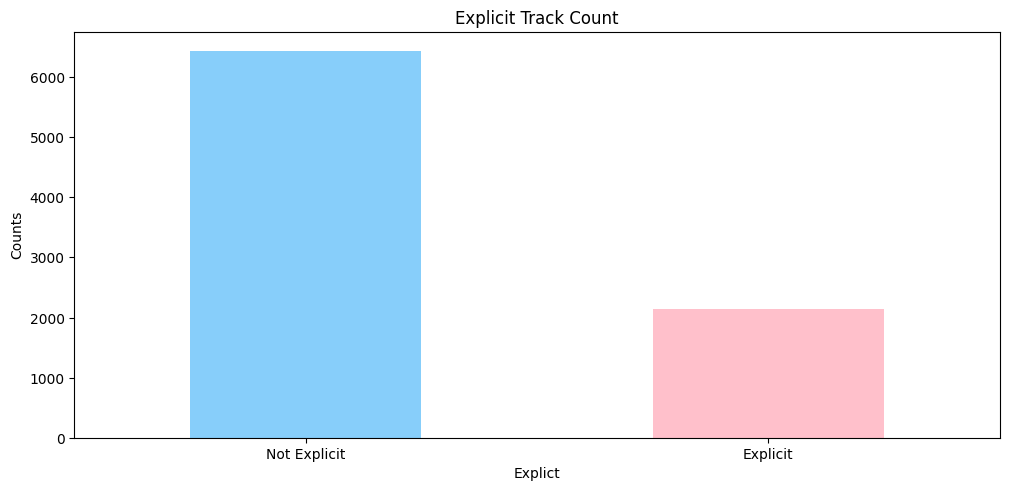

In [15]:
plt.figure(figsize=(10,5))
merged_df['explicit'].value_counts().plot(kind='bar', color=['lightskyblue','pink'])
plt.tight_layout()
plt.xticks([0,1], ['Not Explicit','Explicit'], rotation=0)
plt.title("Explicit Track Count")
plt.xlabel("Explict")
plt.ylabel("Counts")

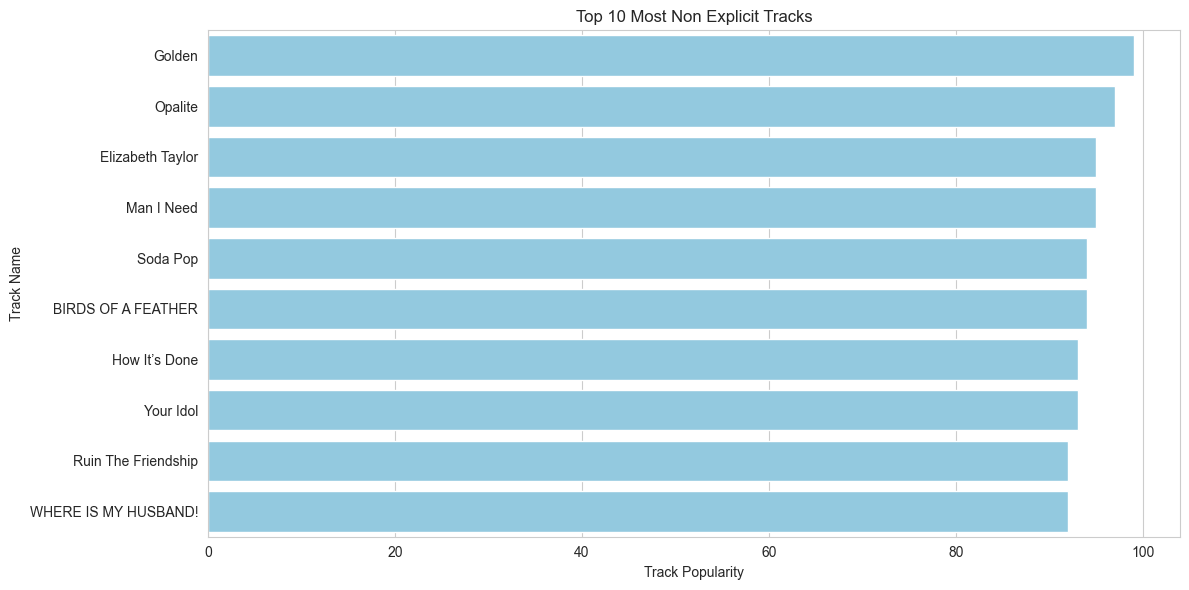

In [16]:
# create a new data frame containing only non explicit tracks
explicit_tracks = merged_df[merged_df['explicit'] == 0]

# Selecting the top 10 
top10_explicit = explicit_tracks.nlargest(10, 'track_popularity').sort_values('track_popularity', ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

sns.barplot(
    x='track_popularity',
    y='track_name',
    data=top10_explicit,
    color="skyblue"
)

plt.title("Top 10 Most Non Explicit Tracks")
plt.xlabel("Track Popularity")
plt.ylabel("Track Name")

plt.tight_layout()
plt.show()

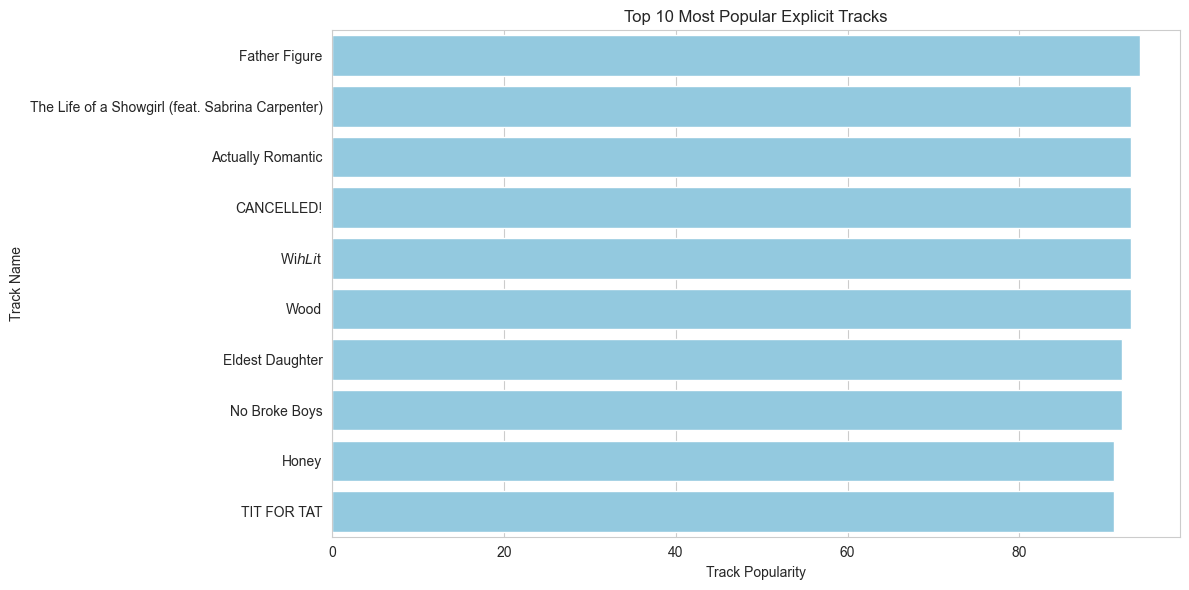

In [17]:
# create a new data frame containing only explicit tracks
explicit_tracks = merged_df[merged_df['explicit'] == 1]

# Selecting the top 10 
top10_explicit = explicit_tracks.nlargest(10, 'track_popularity').sort_values('track_popularity', ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

sns.barplot(
    x='track_popularity',
    y='track_name',
    data=top10_explicit,
    color="skyblue"
)

plt.title("Top 10 Most Popular Explicit Tracks")
plt.xlabel("Track Popularity")
plt.ylabel("Track Name")

plt.tight_layout()
plt.show()

Text(0.5, -30.527777777777786, 'Album Type')

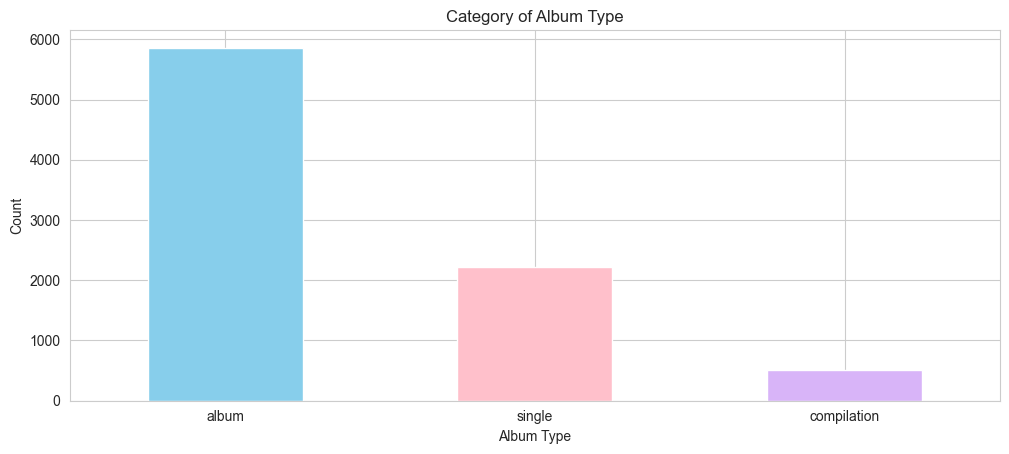

In [18]:
plt.figure(figsize=(10,5))
merged_df['album_type'].value_counts().plot(kind= 'bar', color = ['skyblue', 'pink', '#d8b4f8'])
plt.tight_layout()
plt.xticks(rotation = 0)
plt.title("Category of Album Type")
plt.ylabel("Count")
plt.xlabel("Album Type")

Text(86.47222222222221, 0.5, 'Count of Song')

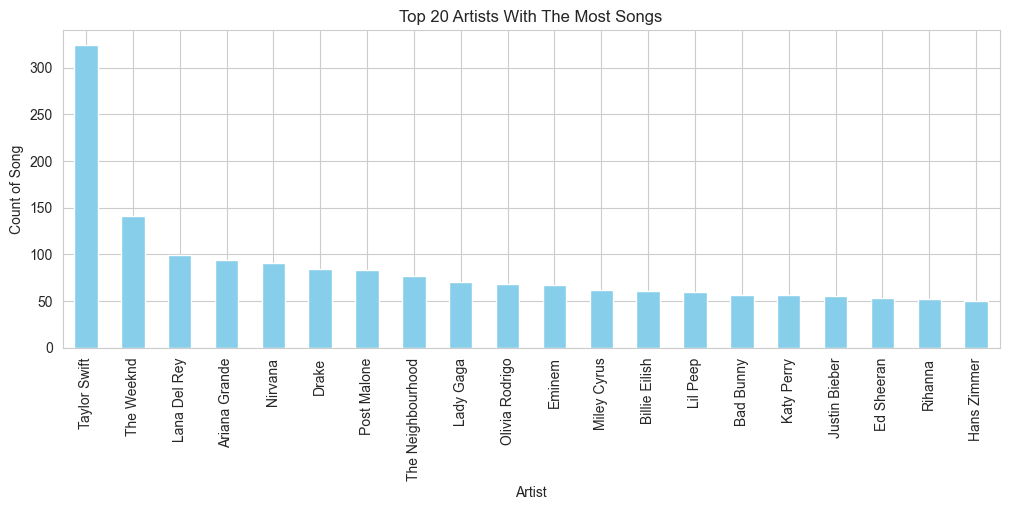

In [19]:
top_n = merged_df['artist_name'].value_counts().head(20)
plt.figure(figsize=(10,5))
top_n.plot(kind='bar', color="skyblue")
plt.tight_layout()
plt.title("Top 20 Artists With The Most Songs")
plt.xlabel("Artist")
plt.ylabel("Count of Song")

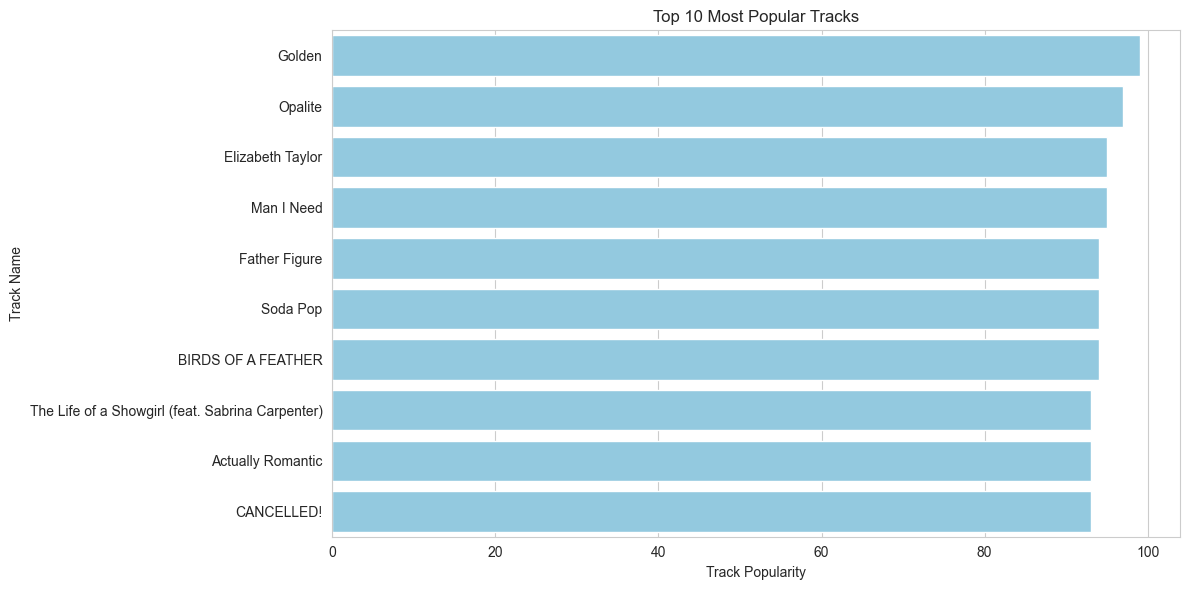

In [20]:
top10 = merged_df.nlargest(10, 'track_popularity').sort_values('track_popularity', ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

sns.barplot(
    x='track_popularity',
    y='track_name',
    data=top10,
    color="skyblue"
)

plt.title("Top 10 Most Popular Tracks")
plt.xlabel("Track Popularity")
plt.ylabel("Track Name")

plt.tight_layout()
plt.show()

top100 = merged_df.nlargest(10, 'track_popularity').sort_values('track_popularity', ascending=False)


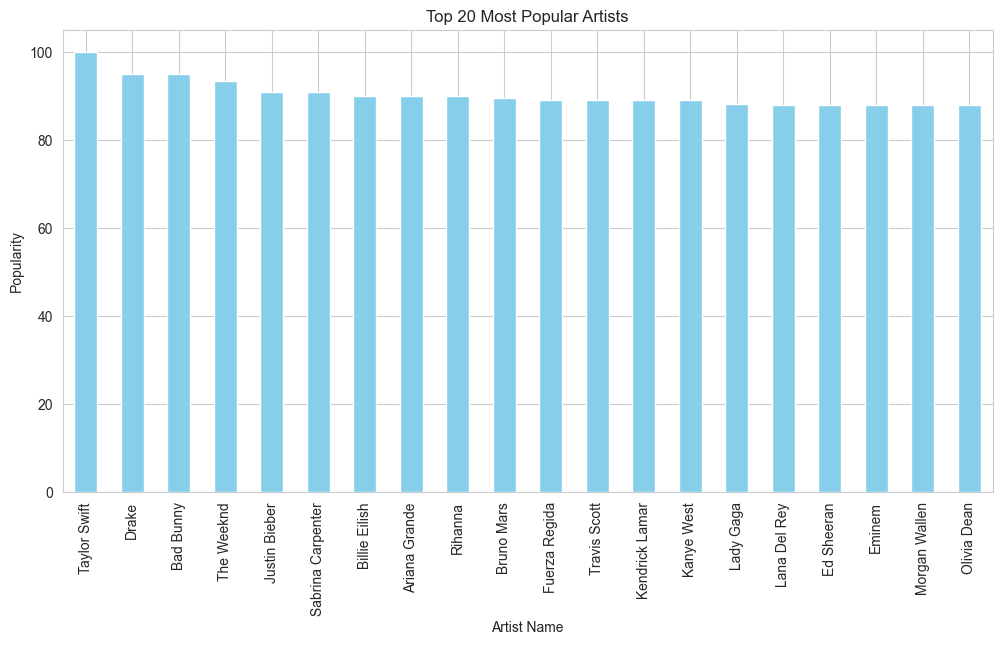

In [21]:
top10 = (
    merged_df
    .groupby('artist_name')['artist_popularity']
    .mean()                      # or .max() depending on your dataset
    .sort_values(ascending=False)
    .head(20)
)

top10.plot(kind='bar', figsize=(12,6), color = 'skyblue')
plt.title("Top 20 Most Popular Artists")
plt.xlabel("Artist Name")
plt.ylabel("Popularity")
plt.show()

Text(86.47222222222221, 0.5, 'Counts')

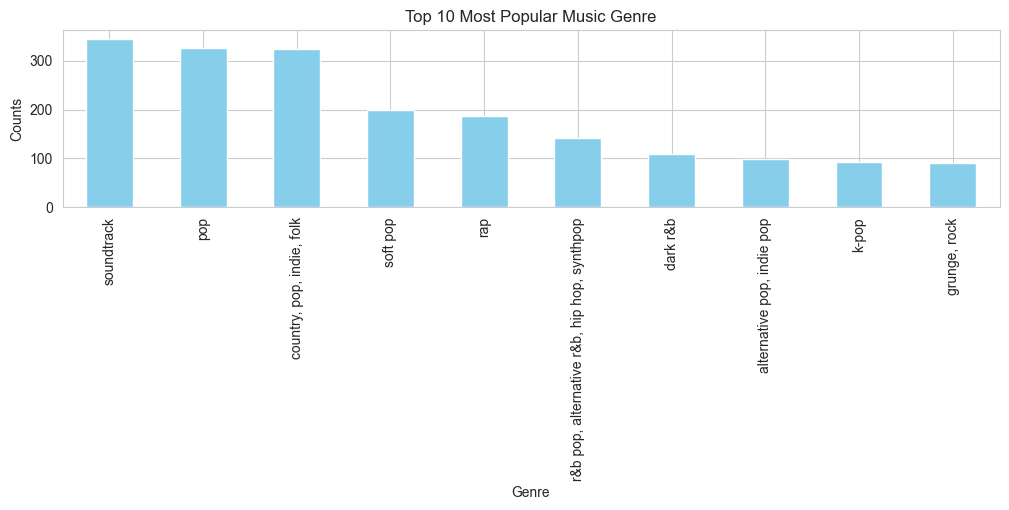

In [22]:
top_n = merged_df['artist_genres'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_n.plot(kind='bar', color = 'skyblue')
plt.tight_layout()
plt.title("Top 10 Most Popular Music Genre")
plt.xlabel("Genre")
plt.ylabel("Counts")

Text(94.22222222222221, 0.5, 'Minutes')

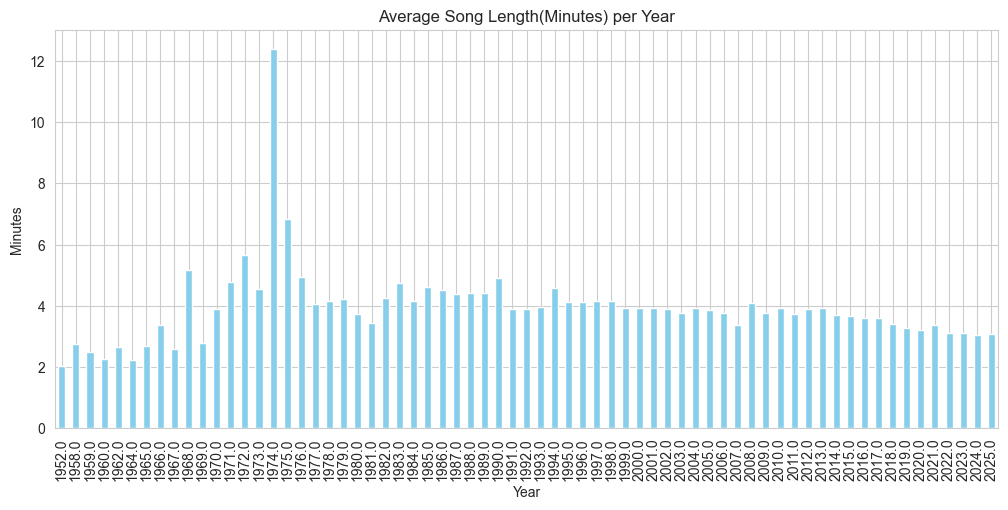

In [23]:
merged_df['year'] = merged_df['album_release_date'].dt.year
mean = merged_df.groupby('year')['track_duration_min'].aggregate('mean')
plt.figure(figsize=(10,5))
mean.plot(kind='bar', color = 'skyblue')
plt.tight_layout()
plt.title("Average Song Length(Minutes) per Year")
plt.xlabel("Year")
plt.ylabel("Minutes")

Text(86.47222222222221, 0.5, 'Counts')

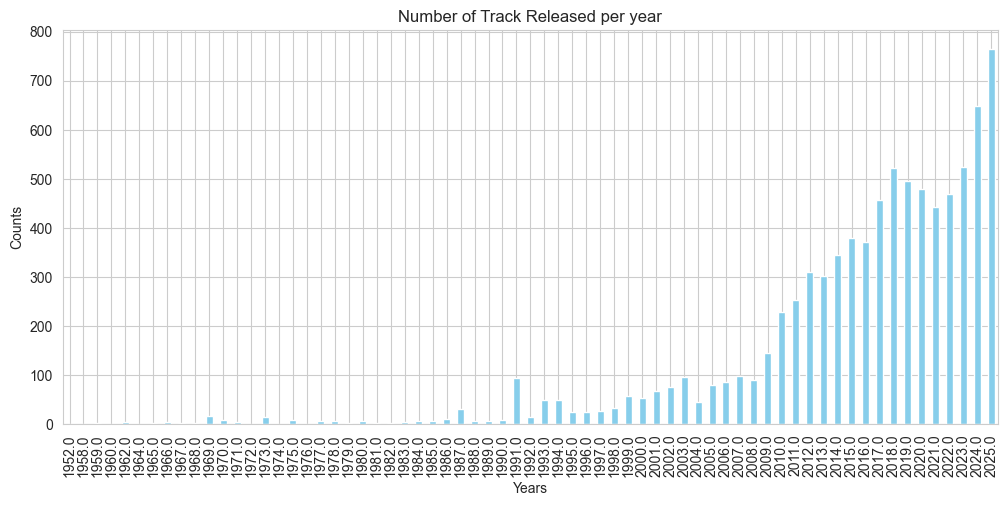

In [24]:
merged_df['year'] = merged_df['album_release_date'].dt.year
plt.figure(figsize=(10,5))
merged_df['year'].value_counts().sort_index().plot(kind='bar', color = 'skyblue')
plt.tight_layout()
plt.title("Number of Track Released per year")
plt.xlabel("Years")
plt.ylabel("Counts")

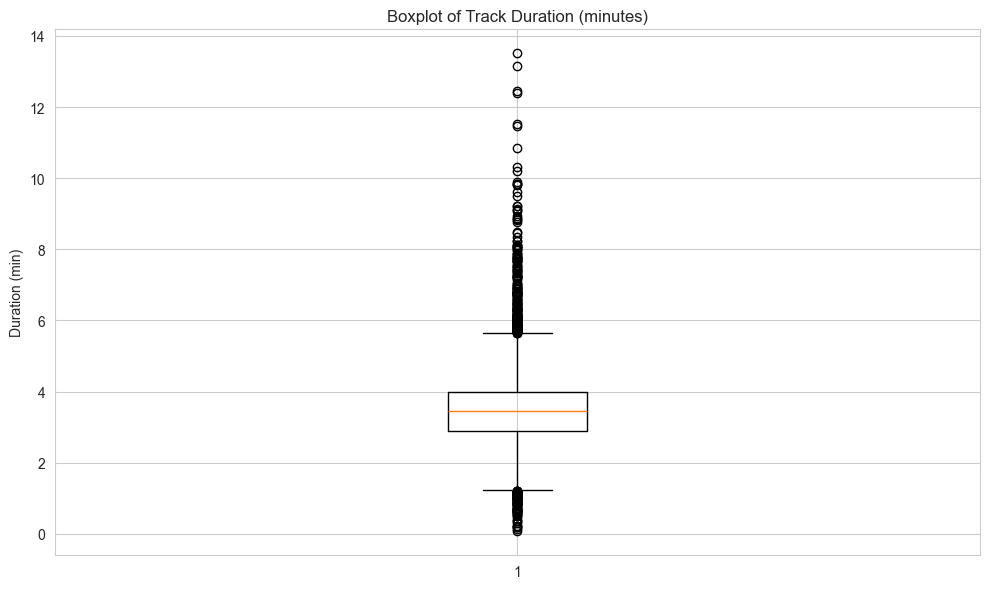

In [25]:
plt.figure(figsize=(10,6))
plt.boxplot(merged_df['track_duration_min'])
plt.title('Boxplot of Track Duration (minutes)')
plt.ylabel('Duration (min)')
plt.tight_layout()
plt.show()

# Lyrics & Sentiment Story: Top 100 Tracks

Up to this point we have focused on **who** is making music and **how** those tracks look in terms of popularity, duration, explicitness, and release year.

In this final section, we zoom in on the **Top 100 most popular tracks in our dataset** and ask:

- What are these songs *actually saying* in their lyrics?
- Are they mostly positive, neutral, or negative in emotional tone?
- Has the emotional tone changed over time?
- Do some genres tend to sound “happier” or “darker”?
- Is there any relationship between lyrical mood and popularity?

We will:
1. Extract the Top 100 tracks by `track_popularity` from `merged_df` (consistent with how we already built the “Top 10 Most Popular Tracks” figure).
2. Fetch lyrics for those tracks (if we haven’t already cached them).
3. Save all lyrics into a CSV (`top100_lyrics.csv`) so we don’t hit the lyrics API repeatedly.
4. Run sentiment analysis using **VADER** and tell a data-driven story with visualizations.


In [26]:
# 1. Select the Top 100 tracks by popularity (consistent with earlier Top 10 logic)

# We follow the same approach used in the "Top 10 Most Popular Tracks" cell,
# but now we extend it to the Top 100.

top100 = (
    merged_df
    .nlargest(500, 'track_popularity')
    .sort_values('track_popularity', ascending=False)
)

# Keep only the columns we actually need for lyrics + analysis
top100 = top100[[
    'track_id',
    'track_name',
    'artist_name',
    'track_popularity',
    'album_release_date',
    'artist_genres'
]].reset_index(drop=True)

print(f"Top 500 tracks selected (rows: {len(top100)})")
top100.head()

Top 500 tracks selected (rows: 500)


,track_id,track_name,artist_name,track_popularity,album_release_date,artist_genres
0,1CPZ5BxNNd0n0nF4Orb9JS,Golden,HUNTR/X,99,2025-06-20,k-pop
1,3yWuTOYDztXjZxdE2cIRUa,Opalite,Taylor Swift,97,2025-10-03,"country, pop, indie, folk"
2,1jgTiNob5cVyXeJ3WgX5bL,Elizabeth Taylor,Taylor Swift,95,2025-10-03,"country, pop, indie, folk"
3,1qbmS6ep2hbBRaEZFpn7BX,Man I Need,Olivia Dean,95,2025-08-15,pop soul
4,03bTIHJElXZ0O0jqOQvAbY,Father Figure,Taylor Swift,94,2025-10-03,"country, pop, indie, folk"


## Fetching Lyrics for the Top 100 Tracks

We don’t have lyrics stored in the original dataset, so we will:

- Use the **track name** and **artist name** from `top100` to query a lyrics API.
- Store the results in a local cache file called `top100_lyrics.csv` so that:
  - The first run may take a while (depending on API rate limits).
  - Subsequent runs simply load the CSV with no additional API calls.

In this notebook we provide **template code** using the popular Genius API via the `lyricsgenius` Python library.

> Important:
> - You must create a Genius API token and paste it below for the fetching to work.
> - Internet access is required when you run this code on your own machine (Kaggle / Colab / local).
> - In this environment, the code is written but not executed, so you can safely adapt it later.


In [27]:
# 2. Fetch or load lyrics for the Top 100 tracks

import os

lyrics_cache_path = "top100_lyrics.csv"

if os.path.exists(lyrics_cache_path):
    print(f"Loading cached lyrics from {lyrics_cache_path} ...")
    lyrics_df = pd.read_csv(lyrics_cache_path)
else:
    print("Lyrics cache not found. This cell is set up to fetch lyrics via the Genius API.")
    print("NOTE: You must run this on a machine with internet access and a valid Genius API token.")
    
    # Uncomment and install if running locally or on Colab/Kaggle with internet:
    # !pip install lyricsgenius typing_extensions
    
    import typing
    if not hasattr(typing, "Self"):
        try:
            from typing_extensions import Self as _Self
        except ImportError as exc:
            raise ImportError(
                "typing_extensions>=4.5 is required on Python < 3.11 to supply typing.Self"

            ) from exc
        typing.Self = _Self
    
    import lyricsgenius
    
    # TODO: REPLACE THIS STRING WITH YOUR REAL GENIUS API TOKEN
    GENIUS_API_TOKEN = "NeIdiVqPj9i3gSWQ7dqRpx6j0p4oUJ_jevi22lhtF3-nON4YFUN-8nYXqrAsWB_E"
    
    genius = lyricsgenius.Genius(
        GENIUS_API_TOKEN,
        timeout=15,
        retries=3,
        remove_section_headers=True,
    )
    
    def fetch_lyrics_for_row(row):
        """Fetch lyrics for a single track using track & artist names."""
        track = str(row['track_name'])
        artist = str(row['artist_name'])
        
        try:
            song = genius.search_song(title=track, artist=artist)
            if song is not None and isinstance(song.lyrics, str):
                return song.lyrics
            else:
                return None
        except Exception as e:
            # If the API fails for this song, we just return None and move on
            print(f"Failed to fetch lyrics for: {track} - {artist}. Error: {e}")
            return None
    
    # Apply the fetch function to all top 100 tracks
    print("Fetching lyrics for Top 100 tracks...")
    top100['lyrics'] = top100.apply(fetch_lyrics_for_row, axis=1)
    
    # Build a compact lyrics dataframe for caching
    lyrics_df = top100[['track_id', 'track_name', 'artist_name', 'lyrics']].copy()
    
    # Save to CSV so we can reuse next time
    lyrics_df.to_csv(lyrics_cache_path, index=False)
    print(f"Saved lyrics for {len(lyrics_df)} tracks to {lyrics_cache_path}")

# Quick sanity check
lyrics_df.head()

Loading cached lyrics from top100_lyrics.csv ...


,track_id,track_name,artist_name,lyrics
0,1CPZ5BxNNd0n0nF4Orb9JS,Golden,HUNTR/X,"[Verse: Rumi, \nZoey\n, \nMira\n, \nAll\n]\nI ..."
1,3yWuTOYDztXjZxdE2cIRUa,Opalite,Taylor Swift,I had a bad habit\nOf missing lovers past\nMy ...
2,1jgTiNob5cVyXeJ3WgX5bL,Elizabeth Taylor,Taylor Swift,Elizabeth Taylor\nDo you think it's forever?\n...
3,1qbmS6ep2hbBRaEZFpn7BX,Man I Need,Olivia Dean,"Talk to me, talk to me\nTalk to me, talk to me..."
4,03bTIHJElXZ0O0jqOQvAbY,Father Figure,Taylor Swift,"When I found you, you were young, wayward, los..."


### Merging Lyrics Back Into the Top 100 Data

Now we merge the cached lyrics dataframe back into `top100` using `track_id`.  
This gives us a single dataframe, `top100_lyrics_df`, that contains:

- Track metadata (name, artist, popularity, year, genres)
- Lyrics text


In [28]:
# 3. Merge lyrics into the Top 100 dataframe

from pathlib import Path

lyrics_cache_path = Path("top100_lyrics.csv")

if 'lyrics_df' not in globals():
    if lyrics_cache_path.exists():
        print(f"lyrics_df not in memory; reloading from {lyrics_cache_path} ...")
        lyrics_df = pd.read_csv(lyrics_cache_path)
    else:
        raise RuntimeError(
            "lyrics_df is undefined and the cache file top100_lyrics.csv was not found. "
            "Run the previous cell to fetch or load lyrics before merging."
        )

if 'top100' not in globals():
    raise RuntimeError(
        "top100 dataframe is undefined. Re-run the cell that selects the Top 100 tracks before merging lyrics."
    )

# Make sure we do not accidentally duplicate rows on merge
lyrics_df = lyrics_df.drop_duplicates(subset=['track_id'])

top100_lyrics_df = top100.merge(
    lyrics_df[['track_id', 'lyrics']],
    on='track_id',
    how='left'
 )

print(top100_lyrics_df[['track_name', 'artist_name', 'lyrics']].head())

missing_lyrics = top100_lyrics_df['lyrics'].isna().sum()
print(f"Tracks without fetched lyrics: {missing_lyrics} out of {len(top100_lyrics_df)}")

         track_name   artist_name  \
0            Golden       HUNTR/X   
1           Opalite  Taylor Swift   
2  Elizabeth Taylor  Taylor Swift   
3        Man I Need   Olivia Dean   
4     Father Figure  Taylor Swift   

                                              lyrics  
0  [Verse: Rumi, \nZoey\n, \nMira\n, \nAll\n]\nI ...  
1  I had a bad habit\nOf missing lovers past\nMy ...  
2  Elizabeth Taylor\nDo you think it's forever?\n...  
3  Talk to me, talk to me\nTalk to me, talk to me...  
4  When I found you, you were young, wayward, los...  
Tracks without fetched lyrics: 22 out of 500


## Sentiment Analysis with VADER (Top 100 Tracks)

With lyrics attached to each track, we can now quantify the **emotional tone** using VADER:

- `neg`, `neu`, `pos` → the proportion of negative / neutral / positive words.
- `compound` → a single score in [-1, 1] summarizing overall sentiment.


In [29]:
# 4. Set up VADER and compute sentiment scores

# If you don't have it yet, install the VADER implementation (when running locally):
# !pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def compute_vader_scores(text):
    """Compute VADER sentiment scores for a single lyrics string."""
    if not isinstance(text, str) or not text.strip():
        # Return NaNs when lyrics are missing
        return pd.Series({'neg': pd.NA, 'neu': pd.NA, 'pos': pd.NA, 'compound': pd.NA})
    
    scores = analyzer.polarity_scores(text)
    return pd.Series(scores)

# Apply to the lyrics column of the Top 100 dataframe
sent_cols = top100_lyrics_df['lyrics'].apply(compute_vader_scores)

for col in ['neg', 'neu', 'pos', 'compound']:
    top100_lyrics_df[col] = sent_cols[col]

top100_lyrics_df[['track_name', 'artist_name', 'neg', 'neu', 'pos', 'compound']].head()

,track_name,artist_name,neg,neu,pos,compound
0,Golden,HUNTR/X,0.03,0.828,0.142,0.9914
1,Opalite,Taylor Swift,0.092,0.705,0.203,0.997
2,Elizabeth Taylor,Taylor Swift,0.103,0.797,0.1,-0.7512
3,Man I Need,Olivia Dean,0.011,0.906,0.083,0.9646
4,Father Figure,Taylor Swift,0.138,0.732,0.13,0.7094


In [30]:
# 5. Label each track as positive / neutral / negative based on compound score

def label_sentiment(compound):
    if pd.isna(compound):
        return "unknown"
    if compound >= 0.05:
        return "positive"
    elif compound <= -0.05:
        return "negative"
    else:
        return "neutral"

top100_lyrics_df['sentiment_label'] = top100_lyrics_df['compound'].apply(label_sentiment)

top100_lyrics_df['sentiment_label'].value_counts(dropna=False)

sentiment_label
positive    328
negative    144
unknown      22
neutral       6
Name: count, dtype: int64

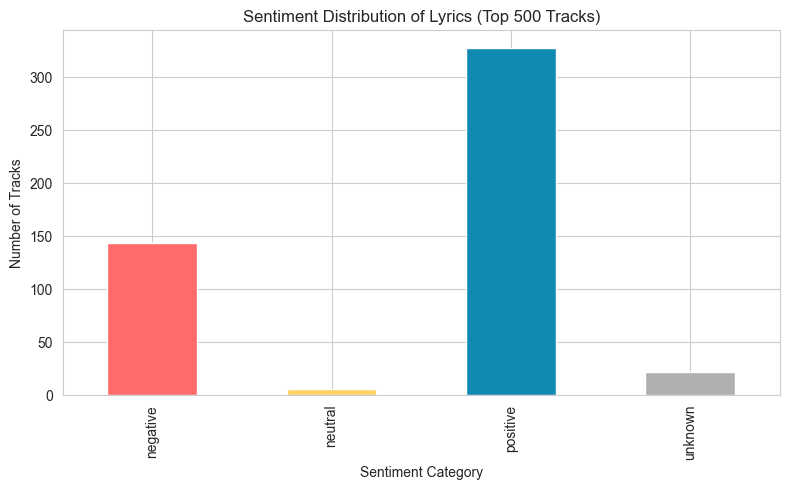

In [39]:
# Overall distribution of sentiment labels for the Top 100 tracks

plt.figure(figsize=(8,5))
ordered_labels = ['negative', 'neutral', 'positive', 'unknown']
sentiment_counts = top100_lyrics_df['sentiment_label'].value_counts().reindex(ordered_labels)
color_map = {
    'negative': '#ff6b6b',
    'neutral': '#ffd166',
    'positive': '#118ab2',
    'unknown': '#b0b0b0'
}
bar_colors = [color_map[label] for label in ordered_labels]

sentiment_counts.plot(kind='bar', color=bar_colors)

plt.title("Sentiment Distribution of Lyrics (Top 500 Tracks)")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Tracks")
plt.tight_layout()
plt.show()


### Story Beat 1: Overall Emotional Flavor of the Top 100

Use this chart to describe the **dominant mood** of the most popular songs:

- Is the tallest bar **positive**, **neutral**, or **negative**?
- Are there many tracks with missing/unknown sentiment (e.g., because lyrics were not found)?

In your slide deck / report, you can write something like (adapt it to match your actual results):

> “Among the Top 100 most popular tracks in our dataset, lyrics tend to be [mostly neutral / slightly positive / heavily negative]. This suggests that popular songs often balance emotional intensity with broadly relatable themes.”


## Sentiment Over Time (Top 100)

Next we look at **how the sentiment of these Top 100 tracks varies by release year.**  
Even though this is a small sample, it can still hint at trends, such as:

- A cluster of more negative songs around certain years.
- A shift toward more upbeat lyrics in recent releases.


In [32]:
# 6. Average sentiment over years for the Top 100

# Ensure we have a numeric year column
if 'year' not in top100_lyrics_df.columns:
    top100_lyrics_df['year'] = pd.to_datetime(
        top100_lyrics_df['album_release_date'],
        errors='coerce'
    ).dt.year

sentiment_by_year_top100 = (
    top100_lyrics_df
    .dropna(subset=['compound', 'year'])
    .groupby('year')['compound']
    .mean()
    .sort_index()
)

sentiment_by_year_top100

year
1966.0      0.9135
1970.0      0.9562
1973.0     0.32715
1977.0     -0.9955
1978.0      0.9759
1979.0     -0.1732
1980.0       0.997
1982.0     0.97775
1983.0      -0.032
1984.0     -0.2975
1985.0    0.925167
1989.0      0.9987
1990.0      0.9936
1991.0      0.1921
1993.0      0.8927
1995.0      0.9937
1997.0    0.279533
1999.0    0.353071
2000.0     0.18855
2001.0   -0.542975
2002.0     0.27685
2003.0    0.458325
2004.0    0.135325
2005.0    0.333117
2006.0      0.7146
2007.0     0.55568
2008.0    0.061371
2009.0     0.99425
2010.0    0.571078
2011.0    0.741427
2012.0    0.501637
2013.0    0.541121
2014.0    0.435269
2015.0    0.293165
2016.0    0.551139
2017.0    0.361679
2018.0    0.291288
2019.0    0.466456
2020.0    0.600037
2021.0    0.264707
2022.0     0.14172
2023.0    0.339769
2024.0    0.420963
2025.0    0.282874
Name: compound, dtype: object

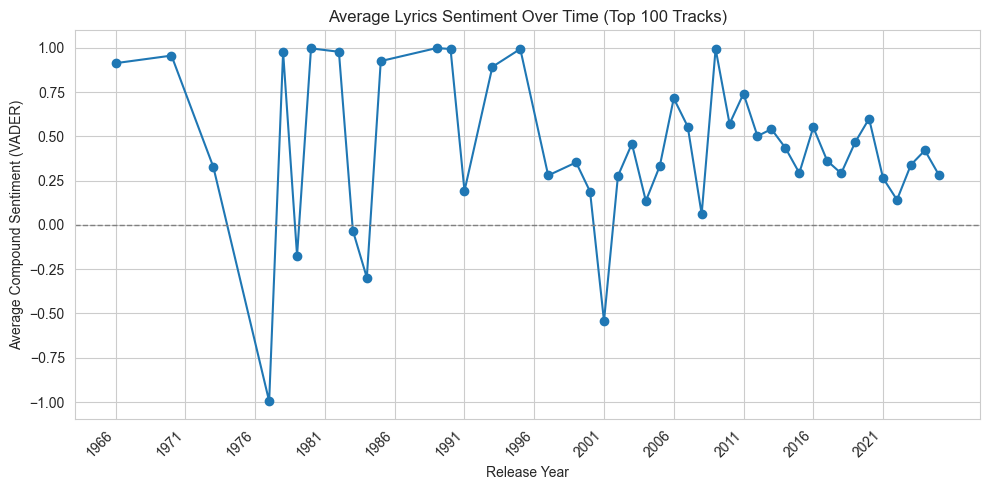

In [33]:
plt.figure(figsize=(10,5))

min_year = int(sentiment_by_year_top100.index.min())
max_year = 2025
year_span = max_year - min_year
if year_span <= 15:
    tick_step = 1
elif year_span <= 30:
    tick_step = 2
elif year_span <= 60:
    tick_step = 5
else:
    tick_step = 10

year_ticks = list(range(min_year, max_year + 1, tick_step))

sentiment_by_year_top100.plot(marker='o')

plt.title("Average Lyrics Sentiment Over Time (Top 100 Tracks)")
plt.xlabel("Release Year")
plt.ylabel("Average Compound Sentiment (VADER)")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xticks(year_ticks, rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Story Beat 2: Emotional Trends Across Years

Talk about what you see in the plot:

- Are there years where the Top 100 tracks you sampled are clearly **more positive** or **more negative**?
- Do recent years cluster around a particular sentiment level?
- Are there any surprising dips or spikes that might relate to global events or trends in music?

Example narrative (replace with what your data actually shows):

> “In our Top 100 sample, tracks released after 2020 show a slight drop in sentiment, suggesting a trend toward more introspective or melancholic lyrics in recent years.”


## Genre-Level Sentiment (Top 100)

Now we ask: **Do different genres in the Top 100 tend to sound happier or darker?**

We’ll extract a simplified `main_genre` label from `artist_genres` and compare the average sentiment score across the most common genres among these songs.


In [34]:
# 7. Genre-level sentiment for the Top 100

def get_main_genre(genre_str):
    if pd.isna(genre_str):
        return "Unknown"
    if isinstance(genre_str, str):
        # Some rows may contain comma-separated genres or a Python-list-like string.
        cleaned = genre_str.strip("[]'\"")
        first = cleaned.split(',')[0].strip().lower()
        return first if first else "Unknown"
    return "Unknown"

top100_lyrics_df['main_genre'] = top100_lyrics_df['artist_genres'].apply(get_main_genre)

# Focus on the most frequent genres for readability
top_genres_top100 = (
    top100_lyrics_df['main_genre']
    .value_counts()
    .head(6)  # 6–8 genres usually keeps the plot readable
    .index
)

genre_sentiment_top100 = (
    top100_lyrics_df[top100_lyrics_df['main_genre'].isin(top_genres_top100)]
    .dropna(subset=['compound'])
    .groupby('main_genre')['compound']
    .mean()
    .sort_values()
)

genre_sentiment_top100

main_genre
alternative pop    0.120658
rap                0.398052
Unknown            0.408198
soft pop           0.466432
country            0.489911
pop                0.663006
Name: compound, dtype: object

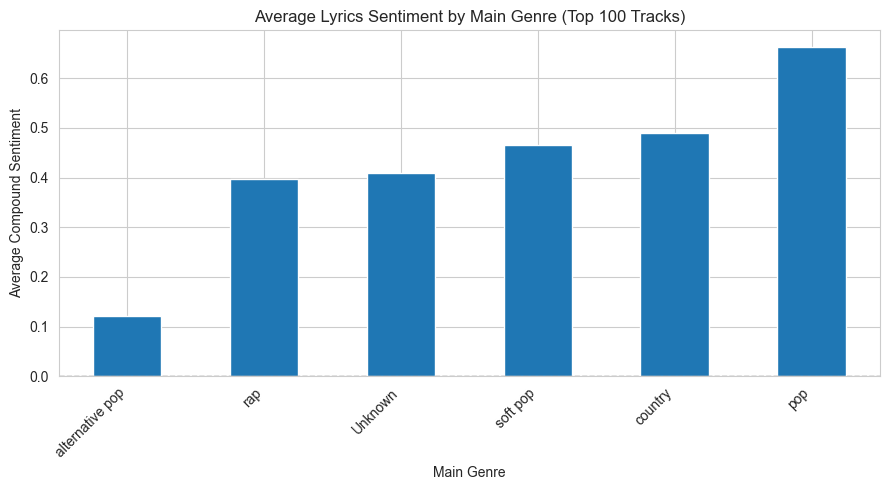

In [35]:
plt.figure(figsize=(9,5))
genre_sentiment_top100.plot(kind='bar')

plt.title("Average Lyrics Sentiment by Main Genre (Top 100 Tracks)")
plt.xlabel("Main Genre")
plt.ylabel("Average Compound Sentiment")
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()


### Story Beat 3: Which Genres Sound Happiest or Darkest?

Use this chart to draw genre-level conclusions, for example:

- Which genres have the **highest** average sentiment? (More upbeat / optimistic lyrics.)
- Which genres have the **lowest** average sentiment? (More introspective / sad / aggressive themes.)
- Are there genres clustered near zero (balanced emotional tone)?

Write a short explanation in your report, such as:

> “Within our Top 100 sample, pop-adjacent genres lean slightly positive, while [genre X] and [genre Y] show lower sentiment scores, reflecting their heavier lyrical themes.”


## Bonus: Does Sentiment Relate to Popularity (Even Within the Top 100)?

Finally, we can see whether **more positive or more negative** songs tend to be more popular among these 100 tracks.

Even though this is a small sample, a quick scatter plot and correlation can give us a hint.


Correlation between sentiment (compound) and track popularity within Top 100: 0.046


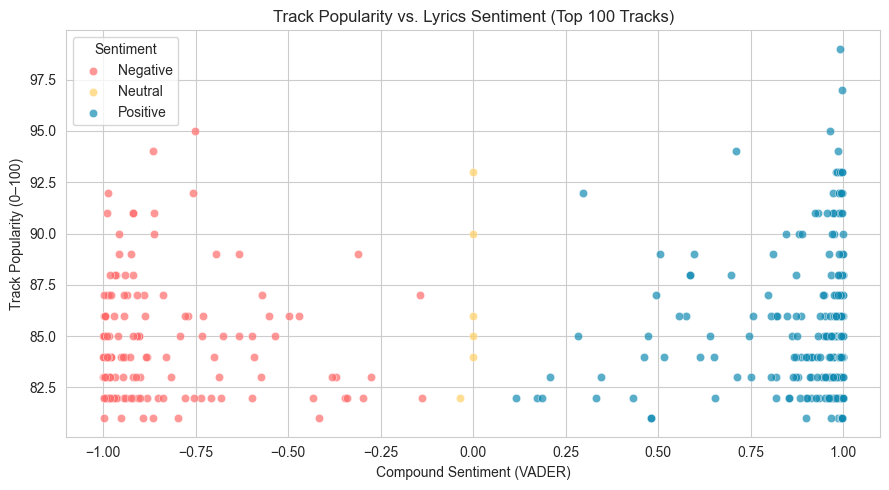

In [36]:
# 8. Sentiment vs. popularity within the Top 100

pop_sent_top100 = top100_lyrics_df.dropna(subset=['compound', 'track_popularity']).copy()

corr_top100 = pop_sent_top100['compound'].corr(pop_sent_top100['track_popularity'])
print(f"Correlation between sentiment (compound) and track popularity within Top 100: {corr_top100:.3f}")

palette = {
    'negative': '#ff6b6b',  # red
    'neutral': '#ffd166',   # yellow
    'positive': '#118ab2',  # blue
    'unknown': '#b0b0b0'
}

plt.figure(figsize=(9,5))
for label, group in pop_sent_top100.groupby('sentiment_label', dropna=False):
    plt.scatter(
        group['compound'],
        group['track_popularity'],
        label=(label.title() if isinstance(label, str) else 'Unknown'),
        color=palette.get(label, '#b0b0b0'),
        alpha=0.7,
        edgecolors='white',
        linewidth=0.4
    )

plt.title("Track Popularity vs. Lyrics Sentiment (Top 100 Tracks)")
plt.xlabel("Compound Sentiment (VADER)")
plt.ylabel("Track Popularity (0–100)")
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

### Story Beat 4: Mood vs. Popularity (Wrap-Up)

Interpret the correlation and scatter plot:

- If the correlation is near **0**, sentiment and popularity are mostly independent.
- If it is **positive**, slightly happier songs tend to be more popular (within this Top 100).
- If it is **negative**, darker songs tend to rank higher in popularity.

This gives you a natural conclusion for your presentation:

> “Within our Top 100 sample, emotional tone alone [does / does not] explain which songs are most popular. While certain genres and years skew happier or sadder, popularity appears to be driven by a combination of other factors (marketing, trends, artist fame, etc.).”


## Bonus Story 5: Projecting Lyric Mood in 2D
To mirror the PCA explorations from earlier homework, we can compress the Top 100 lyric sentiment signals into just two principal components. This gives us a "mood map" where songs cluster by their emotional tone.

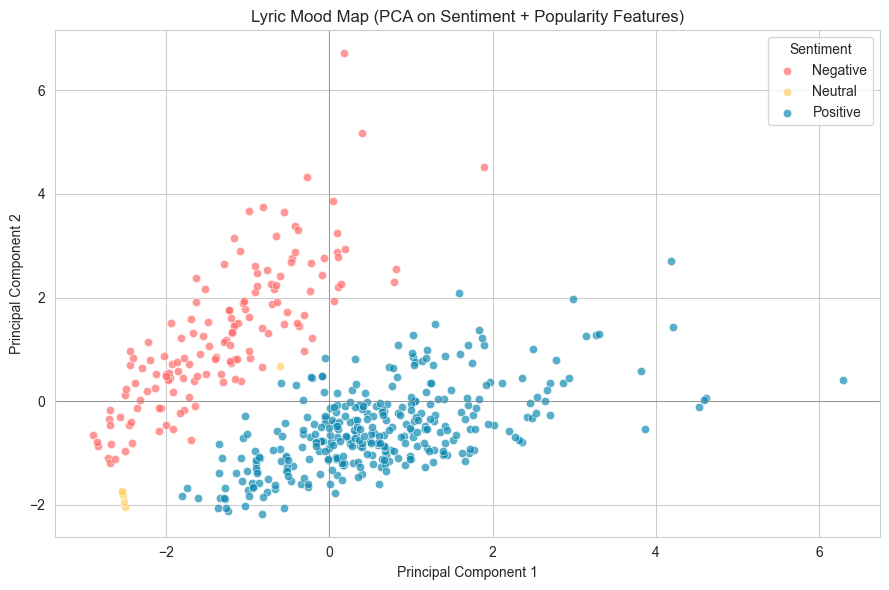

Explained variance by PC1 & PC2: [0.4063808  0.34278091]


In [37]:
# 9. PCA projection of lyric sentiment features
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import matplotlib.colors as mcolors

pca_features = top100_lyrics_df[['neg', 'neu', 'pos', 'compound', 'track_popularity']].dropna().copy()
pca_labels = top100_lyrics_df.loc[pca_features.index, 'sentiment_label']

scaler = StandardScaler()
pca_inputs = scaler.fit_transform(pca_features)
pca = PCA(n_components=2, random_state=42)
pca_coords = pca.fit_transform(pca_inputs)

pca_df = pd.DataFrame({
    'pc1': pca_coords[:, 0],
    'pc2': pca_coords[:, 1],
    'sentiment_label': pca_labels.values
})

palette = {'negative': '#ff6b6b', 'neutral': '#ffd166', 'positive': '#118ab2', 'unknown': '#cccccc'}

plt.figure(figsize=(9,6))
for label, group in pca_df.groupby('sentiment_label'):
    plt.scatter(group['pc1'], group['pc2'], label=label.title(), color=palette.get(label, '#888888'), alpha=0.7, edgecolors='white', linewidth=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Lyric Mood Map (PCA on Sentiment + Popularity Features)')
plt.legend(title='Sentiment')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.tight_layout()
plt.show()

print('Explained variance by PC1 & PC2:', pca.explained_variance_ratio_)

## Bonus Story 6: Can Mood Predict Elite Popularity?
Inspired by earlier modeling assignments, we can reframe popularity as a classification problem ("Is this track in the Top 25% of the Top 100?") and test whether lyric sentiment plus metadata offers predictive power.

                  precision    recall  f1-score   support

Not Top Quartile       0.80      0.46      0.59        95
    Top Quartile       0.40      0.76      0.52        45

        accuracy                           0.56       140
       macro avg       0.60      0.61      0.55       140
    weighted avg       0.67      0.56      0.57       140



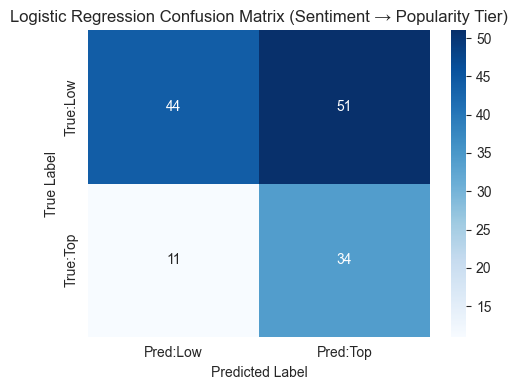

In [38]:
# 10. Predicting whether a track lands in the Top popularity quartile
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model_df = top100_lyrics_df.dropna(subset=['neg', 'neu', 'pos', 'compound', 'year']).copy()
top_quartile_cutoff = model_df['track_popularity'].quantile(0.75)
model_df['is_top_quartile'] = (model_df['track_popularity'] >= top_quartile_cutoff).astype(int)

feature_cols = ['neg', 'neu', 'pos', 'compound', 'year']
X = model_df[feature_cols]
y = model_df['is_top_quartile']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
 )

logit_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=200, class_weight='balanced'))
])
logit_clf.fit(X_train, y_train)

y_pred = logit_clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Not Top Quartile', 'Top Quartile']))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred:Low', 'Pred:Top'], yticklabels=['True:Low', 'True:Top'])
plt.title('Logistic Regression Confusion Matrix (Sentiment → Popularity Tier)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()